In [1]:
#make imports
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
#load train dataset
with open('dataset/dev-v1.1.json') as json_file:
    ds = json.load(json_file)

### Exploratory data analysis

In [116]:
#number of paragraphs - 1 paragraph can contain multiple contexts.
numb_pars = len(ds['data'])
print('There are {} paragraphs in the dataset.'.format(numb_pars))

There are 48 paragraphs in the dataset.


In [117]:
#every paragraph has multiple question and answer pairs. Look at one paragraph. The structure is as follows:
#- 'title': the title of the paragraph, not used;
#- 'context': the passage of text;
#- 'qas': list of question and answer pairs which apply to the paragraph. Each question and answer pair if composed of:
#-- 'question': the question;
#-- 'answers': contains number of first character ('answer_start') and text ('text') of the answering span;
#-- 'id': the id of the paragraph;
ds['data'][0]['paragraphs']

[{'context': 'Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi\'s Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.',
  'qas': [{'answers': [{'answer_start': 177, 'text': 'Denver Broncos'},
     {'answer_start': 177, 'text': 'Denver Broncos'},
     {'answer_start': 177, 'text': 'Denver Broncos'}],
    'question': 'Which NFL

In [118]:
#total number of contexts in the dataset
count = 0
for par in ds['data']:
    for cont in par['paragraphs']:
        count += 1
numb_conts = count
print('There are {} contexts in total.'.format(numb_conts))

There are 2067 contexts in total.


In [119]:
#total number of question-answer pairs in the dataset
count = 0
for par in ds['data']:
    for cont in par['paragraphs']:
        for qap in cont['qas']:
            count += 1
print('There are {} question-answer pairs in total.'.format(count))

There are 10570 question-answer pairs in total.


In [120]:
#average number of question-answer pairs per context
print('The average number of question-answer pairs per context is {0:.1f}.'.format(count/numb_conts))

The average number of question-answer pairs per context is 5.1.


In [121]:
#approximate number of tokens in contexts (using white spacing to separate tokens)
i_par = list()
i_cont = list()
cont_len = list()
i_par_idx = 0 
for par in ds['data']:
    i_cont_idx = 0
    for cont in par['paragraphs']:
        cont_len.append(len(cont['context'].split(' ')))
        i_par.append(i_par_idx)
        i_cont.append(i_cont_idx)
        i_cont_idx += 1
    i_par_idx += 1

In [122]:
#average number of tokens per context
print('There are {0:.1f} tokens in a context on average.'.format(np.mean(cont_len)))

There are 122.8 tokens in a context on average.


In [123]:
#minimum number of tokens in a context
print('The shortest context has {0:d} tokens. See context below:'.format(np.min(cont_len)))
print('')
print(ds['data'][i_par[np.argmin(cont_len)]]['paragraphs'][i_cont[np.argmin(cont_len)]]['context'])

The shortest context has 22 tokens. See context below:

The Colorado experiments had prepared Tesla for the establishment of the trans-Atlantic wireless telecommunications facility known as Wardenclyffe near Shoreham, Long Island.


In [124]:
#maximum number of tokens in a context
print('The longest context has {0:d} tokens. See context below:'.format(np.max(cont_len)))
print('')
print(ds['data'][i_par[np.argmax(cont_len)]]['paragraphs'][i_cont[np.argmax(cont_len)]]['context'])

The longest context has 629 tokens. See context below:

The "freedom to provide services" under TFEU article 56 applies to people who give services "for remuneration", especially commercial or professional activity. For example, in Van Binsbergen v Bestuur van de Bedrijfvereniging voor de Metaalnijverheid a Dutch lawyer moved to Belgium while advising a client in a social security case, and was told he could not continue because Dutch law said only people established in the Netherlands could give legal advice. The Court of Justice held that the freedom to provide services applied, it was directly effective, and the rule was probably unjustified: having an address in the member state would be enough to pursue the legitimate aim of good administration of justice. The Court of Justice has held that secondary education falls outside the scope of article 56, because usually the state funds it, though higher education does not. Health care generally counts as a service. In Geraets-Smits v St

(array([ 51.,  76., 191., 520., 413., 293., 211., 102.,  84.,  38.,  25.,
         18.,  10.,  10.,   3.,   6.,   6.,   0.,   1.,   1.,   0.,   2.,
          2.,   0.,   2.,   1.,   0.,   0.,   0.,   1.]),
 array([ 22.        ,  42.23333333,  62.46666667,  82.7       ,
        102.93333333, 123.16666667, 143.4       , 163.63333333,
        183.86666667, 204.1       , 224.33333333, 244.56666667,
        264.8       , 285.03333333, 305.26666667, 325.5       ,
        345.73333333, 365.96666667, 386.2       , 406.43333333,
        426.66666667, 446.9       , 467.13333333, 487.36666667,
        507.6       , 527.83333333, 548.06666667, 568.3       ,
        588.53333333, 608.76666667, 629.        ]),
 <a list of 30 Patch objects>)

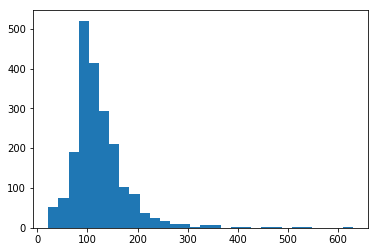

In [125]:
#distribution of number of tokens per context
plt.hist(cont_len, 30)

In [126]:
#length of questions:
i_par = list()
i_cont = list()
i_qap = list()
ques_len = list()
i_par_idx = 0
for par in ds['data']:
    i_cont_idx = 0
    for cont in par['paragraphs']:
        i_qap_idx = 0
        for qap in cont['qas']:
            ques_len.append(len(qap['question'].split(' ')))
            i_par.append(i_par_idx)
            i_cont.append(i_cont_idx)
            i_qap.append(i_qap_idx)
            i_qap_idx += 1
        i_cont_idx += 1
    i_par_idx += 1

In [127]:
#minimum number of tokens in a question
print('The shortest question has {0:d} tokens. See question below:'.format(np.min(ques_len)))
print('')
print(ds['data'][i_par[np.argmin(ques_len)]]['paragraphs'][i_cont[np.argmin(ques_len)]]
      ['qas'][i_qap[np.argmin(ques_len)]]['question'])

The shortest question has 3 tokens. See question below:

Who was Warsz?


In [128]:
#maximum number of tokens in a question
print('The longest question has {0:d} tokens. See question below:'.format(np.max(ques_len)))
print('')
print(ds['data'][i_par[np.argmax(ques_len)]]['paragraphs'][i_cont[np.argmax(ques_len)]]
      ['qas'][i_qap[np.argmax(ques_len)]]['question'])

The longest question has 33 tokens. See question below:

What was the name of the event at the The Embarcadero that was held prior to Super Bowl 50 to help show off some of the things that San Francisco has to offer?


(array([3.000e+01, 1.900e+02, 4.050e+02, 7.310e+02, 1.018e+03, 1.230e+03,
        1.284e+03, 1.316e+03, 1.063e+03, 9.160e+02, 6.630e+02, 4.720e+02,
        3.740e+02, 2.690e+02, 1.870e+02, 1.390e+02, 8.700e+01, 7.100e+01,
        3.500e+01, 3.300e+01, 2.300e+01, 9.000e+00, 7.000e+00, 6.000e+00,
        3.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
        16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
        29., 30., 31., 32., 33.]),
 <a list of 30 Patch objects>)

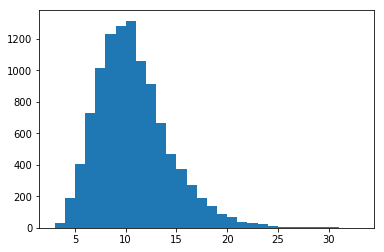

In [129]:
#distribution of number of tokens per question
#del ques_len[75237] #for training SQuAD
plt.hist(ques_len, 30)

In [130]:
#length of answers:
i_par = list()
i_cont = list()
i_qap = list()
ans_len = list()
i_par_idx = 0
for par in ds['data']:
    i_cont_idx = 0
    for cont in par['paragraphs']:
        i_qap_idx = 0
        for qap in cont['qas']:
            ans_len.append(len(qap['answers'][0]['text'].split(' ')))
            i_par.append(i_par_idx)
            i_cont.append(i_cont_idx)
            i_qap.append(i_qap_idx)
            i_qap_idx += 1
        i_cont_idx += 1
    i_par_idx += 1

In [131]:
#minimum number of tokens in an answer
print('The shortest answer has {0:d} tokens. See below:'.format(np.min(ans_len)))
print('')
print(ds['data'][i_par[np.argmin(ans_len)]]['paragraphs'][i_cont[np.argmin(ans_len)]]
      ['qas'][i_qap[np.argmin(ans_len)]]['answers'][0]['text'])

The shortest answer has 1 tokens. See below:

gold


In [132]:
#maximum number of tokens in an answer
print('The longest answer has {0:d} tokens.'.format(np.max(ans_len)))
print('')
print(ds['data'][i_par[np.argmax(ans_len)]]['paragraphs'][i_cont[np.argmax(ans_len)]]
      ['qas'][i_qap[np.argmax(ans_len)]]['answers'][0]['text'])

The longest answer has 29 tokens.

a mouth that can usually be closed by muscles; a pharynx ("throat"); a wider area in the center that acts as a stomach; and a system of internal canals.


(array([3.429e+03, 2.880e+03, 1.695e+03, 8.460e+02, 4.980e+02, 3.040e+02,
        2.090e+02, 1.370e+02, 1.140e+02, 1.060e+02, 6.000e+01, 5.700e+01,
        4.600e+01, 4.100e+01, 0.000e+00, 3.400e+01, 1.700e+01, 1.800e+01,
        1.200e+01, 1.600e+01, 9.000e+00, 1.500e+01, 4.000e+00, 8.000e+00,
        4.000e+00, 7.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.        ,  1.93333333,  2.86666667,  3.8       ,  4.73333333,
         5.66666667,  6.6       ,  7.53333333,  8.46666667,  9.4       ,
        10.33333333, 11.26666667, 12.2       , 13.13333333, 14.06666667,
        15.        , 15.93333333, 16.86666667, 17.8       , 18.73333333,
        19.66666667, 20.6       , 21.53333333, 22.46666667, 23.4       ,
        24.33333333, 25.26666667, 26.2       , 27.13333333, 28.06666667,
        29.        ]),
 <a list of 30 Patch objects>)

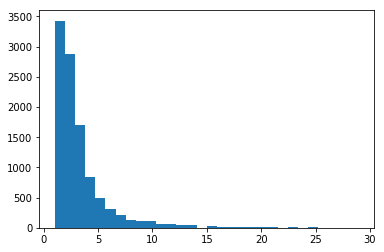

In [133]:
#distribution of number of tokens per answer
plt.hist(ans_len, 30)

In [134]:
#percentage of entries whose length of context + length of question is in excess of 509 
#(limit of BERT input, 512, minus 3 reserved tokens - CLS, SEP, SEP)
cont_len_unfold = [cont_len[i] for i in i_cont]
cont_ques_len = np.array(cont_len_unfold) + np.array(ques_len)
'{0:.2f}% of the data exceeds maximum BERT limit on token length'.\
format(100*np.sum(cont_ques_len > 509)/float(len(cont_ques_len)))

'0.00% of the data exceeds maximum BERT limit on token length'

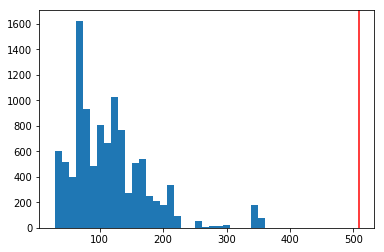

In [135]:
#distribution of length of context and length of question
plt.hist(cont_ques_len, 30)
plt.axvline(x=509,color='red')

### Data cleansing

In [208]:
#identify all paragraphs whose context length combined with at least 
#the length of one question leads to an excess of the 509 threshold
idx_long_par = np.unique(np.array(i_par)[par_ques_len>509])
idx_long_par

array([  2,   3,   7,   8,  11,  13,  14,  17,  18,  19,  20,  21,  23,
        25,  30,  31,  37,  38,  39,  40,  41,  42,  43,  44,  52,  53,
        54,  55,  56,  59,  62,  65,  66,  68,  70,  71,  75,  77,  78,
        79,  84,  85,  89,  90,  93,  94,  97,  98,  99, 100, 101, 104,
       105, 106, 107, 108, 111, 113, 114, 120, 121, 122, 123, 124, 125,
       127, 129, 131, 134, 135, 136, 137, 143, 144, 145, 146, 148, 150,
       151, 153, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 182, 185, 186,
       187, 189, 192, 193, 196, 197, 199, 200, 203, 204, 205, 206, 208,
       210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 224, 227,
       229, 230, 231, 232, 234, 235, 237, 238, 240, 241, 242, 244, 246,
       247, 248, 255, 256, 257, 262, 264, 265, 267, 269, 272, 274, 275,
       276, 277, 279, 281, 284, 285, 287, 288, 292, 294, 295, 296, 297,
       300, 301, 302, 303, 306, 313, 316, 318, 319, 320, 321, 32

In [209]:
#import NewsQA raw data
import gzip
input_file = 'C:\\Users\\VLMF\\Desktop\\Project_W266\\NewsQA\\NewsQA_dev.jsonl.gz'
with gzip.GzipFile(input_file, 'r') as reader:
        # skip header
        content = reader.read().decode('utf-8').strip().split('\n')[1:]
        input_data = [json.loads(line) for line in content]

In [210]:
#Convert data to SQuAD formatted json file
jsondata = {}
data = list()

i = 0
j = 0

for story_idx in input_data: 
#loop over stories
    if i in idx_long_par:
        i += 1
        continue
    else:
        print(i, '/', len(input_data))
        story = {}
        paragraphs = list()
        cont_and_qas = {}
        qas = list()
    
        story['title'] = 'DummyTitle'
        context = story_idx['context']
        cont_and_qas['context'] = context

        for qa in story_idx['qas']:
        #loop over questions and answers in story
            j += 1
            answer_start = qa['detected_answers'][0]['char_spans'][0][0]
            text = qa['detected_answers'][0]['text']
            question = qa['question']
            id = qa['id']
            qas.append({'answers': [{'answer_start': answer_start, 'text': text}], 'question': question, 'id': id})

        cont_and_qas['qas'] = qas
        paragraphs.append(cont_and_qas)


        story['paragraphs'] = paragraphs
        data.append(story)
        
        i += 1

jsondata['data'] = data
jsondata['version'] = 'newsQA_train_clean'

print('Total number of question/answer pairs: ', j)

0 / 638
1 / 638
4 / 638
5 / 638
6 / 638
9 / 638
10 / 638
12 / 638
15 / 638
16 / 638
22 / 638
24 / 638
26 / 638
27 / 638
28 / 638
29 / 638
32 / 638
33 / 638
34 / 638
35 / 638
36 / 638
45 / 638
46 / 638
47 / 638
48 / 638
49 / 638
50 / 638
51 / 638
57 / 638
58 / 638
60 / 638
61 / 638
63 / 638
64 / 638
67 / 638
69 / 638
72 / 638
73 / 638
74 / 638
76 / 638
80 / 638
81 / 638
82 / 638
83 / 638
86 / 638
87 / 638
88 / 638
91 / 638
92 / 638
95 / 638
96 / 638
102 / 638
103 / 638
109 / 638
110 / 638
112 / 638
115 / 638
116 / 638
117 / 638
118 / 638
119 / 638
126 / 638
128 / 638
130 / 638
132 / 638
133 / 638
138 / 638
139 / 638
140 / 638
141 / 638
142 / 638
147 / 638
149 / 638
152 / 638
154 / 638
155 / 638
157 / 638
168 / 638
169 / 638
175 / 638
181 / 638
183 / 638
184 / 638
188 / 638
190 / 638
191 / 638
194 / 638
195 / 638
198 / 638
201 / 638
202 / 638
207 / 638
209 / 638
217 / 638
222 / 638
223 / 638
225 / 638
226 / 638
228 / 638
233 / 638
236 / 638
239 / 638
243 / 638
245 / 638
249 / 638
250 / 6

In [211]:
#Save to json file
with open('dataset/NewsQA_dev_clean.json', 'w') as outfile:
    json.dump(jsondata, outfile)

Things to clarify:
- punctuation in BERT, how is it handled?
- how does BERT handle entries in excess of the 512 threshold?